# Introduction


**What?** Step-by-step creation of a deep learning framework



# Plan of attack


- **Our main goal** is to design an OO ANNs, that to say an Object-Oriented Artifical Neural Network.
- We are going to create a `Tensor` class and will modify it 6 times.
- Every time we add something weill add an integer so we'll keep track of what we are changing.



# Import modules

In [2]:
import numpy as np
import copy

# Step #1 - Create a tensor support


- A **vector** is a one-dimensional tensor. 
- A **matrix** is a two-dimensional tensor.
- A higher dimensions are referred to as **n-dimensional tensors.**
- Since we want to create something general, we then create a framework for tensor only.
- `__str__ `function is supposed to return a human-readable format, which is good for logging or to 
display some information about the object. 
- `__repr__` function is supposed to return an “official” string representation of the object, which 
can be used to construct the object again.



In [23]:
class Tensor_V0(object):

    """Tensor class

    Stores all the numerical information in a NumPy array (self.data)
    Supports one tensor operation (addition)
    """

    def __init__(self, data):
        """__init__ method

        Given a list makes it into an array
        """

        self.data = np.array(data)

    def __add__(self, other):
        """__add__ method

        “+” is just syntactic sugar around the “__add__” method
        so x+y is equivalent to x.__add__(y)
        """

        return Tensor(self.data + other.data)

    def __repr__(self):
        """__repr__ method

        Returns the object representation in string format.
        Returns an “official” string representation of the object,
        which can be used to construct th eobject again.
        """

        return str(self.data.__repr__())

    def __str__(self):
        """__str__ method

        Returns the string representation of the object. This method is called 
        when print() or str() function is invoked on an object. Returns a
        human-readable format.
        """

        return str(self.data.__str__())

In [8]:
x = Tensor([1,2,3,4,5])

In [9]:
x

array([1, 2, 3, 4, 5])

In [10]:
# Official string representation.
repr(x)

'array([1, 2, 3, 4, 5])'

In [20]:
# now you can use it to recreate it!
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [11]:
# human-readable representation
str(x)

'[1 2 3 4 5]'

In [12]:
# Adding two tensors
x + x

array([ 2,  4,  6,  8, 10])

In [13]:
# Check type
type(x)

__main__.Tensor

In [14]:
x.data

array([1, 2, 3, 4, 5])

In [15]:
# See all class methods and instance attribute
dir(x)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data']

In [19]:
# Is x an instance of the class Tensor?
isinstance(x, Tensor)

True

# Step #2 - adding back propgation


- Backpropagation (aka backpro) is just a fancy name to compute the gradient and propagat back. The propgation is needed because we have more than one layers.
- To be precise backprop **does not** compute gradient what is does. It just propagates it from output to input.
- Simplistically it involves the computation the gradient at the output of the network which is then propagate all the wait back while updatating the weights on each layers. This is done untill a convergence criterion is met



In [356]:
class Tensor_V1(object):

    """Tensor class

    Stores all the numerical information in a NumPy array (self.data)
    Supports one tensor operation (addition)
    """

    def __init__(self, data, creators=None, creation_op=None, verboseCall=True):
        """__init__ method

        data string

        creators  string
            list containing any tensors used in the creation of the
            current tensor (which defaults to None). 
        creation_op string
            string describes the operation between the two creator tensor.
        verboseCall Bool
            True if you want to print the method being called

        """
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
        self.verboseCall = verboseCall

    def myPrintDecorator(func):
        """My print decorator

        Print the name of the method when it is called.
        """

        def printCallNameMethod(self, *args, **kwargs):
            if self.verboseCall == True:
                print("Using method", func.__name__)
            instance = func(self, *args, **kwargs)
            return instance
        return printCallNameMethod

    @myPrintDecorator
    def backward(self, grad):
        self.grad = grad
        if(self.creation_op == "add"):
            self.creators[0].backward(grad)
            self.creators[1].backward(grad)

    @myPrintDecorator
    def __add__(self, other):
        """__add__ method

        “+” is just syntactic sugar around the “__add__” method
        so x+y is equivalent to x.__add__(y).

        ensors x and y are added together, z has two creators
        """
        return Tensor_V1(self.data + other.data,
                         creators=[self, other],
                         creation_op="add")

    @myPrintDecorator
    def __repr__(self):
        """__repr__ method
        Returns the object representation in string format.
        Returns an “official” string representation of the object,
        which can be used to construct th eobject again.
        """
        return str(self.data.__repr__())

    @myPrintDecorator
    def __str__(self):
        """
        Returns the string representation of the object. This method is called 
        when print() or str() function is invoked on an object. Returns a
        human-readable format.
        """
        return str(self.data.__str__())


- To create the backward pass we'll use the concept of **graph**.
- To do this we first assign two new attributes:
    - `creators = None` = list containing any tensors used in the creation of the current tensor.
    - `creation_op = None` = string describes the operation between the two creator tensor.


- `z = x + y` creates a **computation graph** with three nodes (x, y, and z) and two edges (z -> x and z -> y). Each edge is labeled 
by the creation_op add. This graph allows you to recursively backpropagate gradients.
- This notion graph gets built during forward propagation on-the-fly and is called **dynamic computation graph**. This is in constrast with another method called **stati computational graph**.



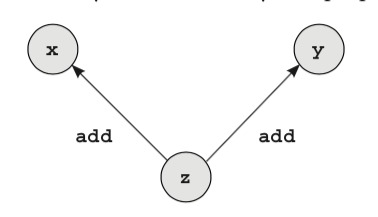

In [357]:
# Let's create two tensor
x = Tensor_V1([1, 2, 3, 4, 5])
y = Tensor_V1([1, 2, 3, 4, 5])

In [358]:
# You can now see why we use the attribute none at the begging.
# These are the inputs thus they do not have neither a cretor none an operation attached to
# unless we do explicitly as int the following case
print(y.creation_op)
print(y.creators)

None
None


In [359]:
"""
Now we are going to create another tensor which has a creators and 
creation_op attributes given at the instantiation time
"""
xDummy = Tensor_V1([1, 2, 3, 4, 5], creators=[[1, 3], [2]], creation_op="test")
print(xDummy.creation_op)
print(xDummy.creators)

test
[[1, 3], [2]]


In [360]:
# Going ot back to our example, let's build sum our two tensor
z = x + y

Using method __add__


In [361]:
z

Using method __repr__


array([ 2,  4,  6,  8, 10])

In [362]:
print(z)

Using method __str__
[ 2  4  6  8 10]


In [363]:
# Show the creators
z.creators

Using method __repr__
Using method __repr__


[array([1, 2, 3, 4, 5]), array([1, 2, 3, 4, 5])]

In [364]:
# Show the operation
z.creation_op

'add'


- **How do we propagate the gradient?** and we have not asked **How do we compute the gradient?!**
- Let's say we have a gradients which is passed to z. Apply backpropagation means the gradient is applied to z parents: x and y. 
- Further, backpropagating through addition means also applying addition when backpropagating. 
- In this case, because there’s only one gradient to add into x or y, you copy the gradient from z onto x and y.



In [365]:
# Let's create a dummy gradient
gradients = Tensor_V1(np.array([1,1,1,1,1]))
# This will work as well
#gradients = Tensor_V1([1,1,1,1,1])

In [366]:
z.backward(gradients)

Using method backward
Using method backward
Using method backward


In [370]:
# the gradient is passed wthouht change as we wanted
print(x.grad)
print(y.grad)

Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]



- Perhaps the **most elegant part** of this form of autograd is that it works recursively as well, because each 
vector calls .backward() on all of its self.creators:



In [372]:
a = Tensor_V1([1, 2, 3, 4, 5])
b = Tensor_V1([2, 2, 2, 2, 2])
c = Tensor_V1([5, 4, 3, 2, 1])
d = Tensor_V1([-1, -2, -3, -4, -5])
e = a+b
f = c+d
g = e+f
gradients = Tensor_V1([1, 1, 1, 1, 1])
# We apply the gradient to the last element and we'll show how this is propgated backword
g.backward(gradients)
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)
print(e.grad)
print(f.grad)

Using method __add__
Using method __add__
Using method __add__
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]
Using method __str__
[1 1 1 1 1]


# Step #3 - Tensors that are used multiple times


- The current version of Tensor supports backpropagating into a variable only once. 
- But sometimes, during forward propagation, you’ll use the same tensor multiple times (the weights of a neural network), and thus multiple parts of the graph will backpropagate gradients into the same tensor.
- But the code will currently compute the INCORRECT gradient when backpropagating into a variable that was used multiple times.



In [377]:
a = Tensor_V1([1, 2, 3, 4, 5])
b = Tensor_V1([2, 2, 2, 2, 2])
c = Tensor_V1([5, 4, 3, 2, 1])

d = a+b
e = b+c
f = d+e
gradients = Tensor_V1(np.array([1, 1, 1, 1, 1]))
f.backward(gradients)
# We know that the gradient of b should be [2,2,2,2,2] and not [1,1,1,1,1]
print(b.grad.data == np.array([2, 2, 2, 2, 2]))
print(b.grad)

Using method __add__
Using method __add__
Using method __add__
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
Using method backward
[False False False False False]
Using method __str__
[1 1 1 1 1]



- In this example, the b variable is used twice in the process of creating f. 
- Thus, its gradient should be the sum of two derivatives: [2,2,2,2,2]. 
- Shown here is the resulting graph created by this chain of operations. 
- Notice there are now two pointers pointing into b: so, it should be the sum of the gradient coming from both e and d. 
- But the current implementation of Tensor merely overwrites each derivative with the previous. First, d applies  its gradient, and then it gets overwritten with the gradient from e. 
- We need to change the way gradients are written.



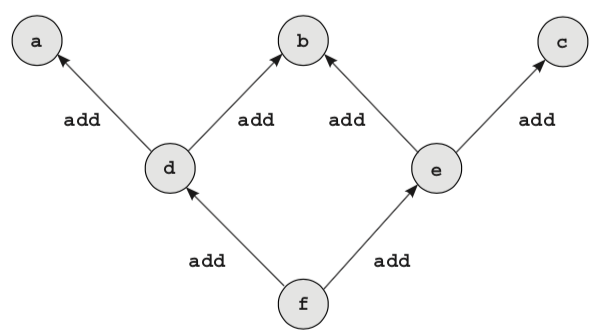

In [378]:
class Tensor_V3 (object):

    """Tensor class

    Stores all the numerical information in a NumPy array (self.data), and it 
    supports one tensor operation (addition).
    """

    def __init__(self, data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        """__init__ method

        Given a list makes it into an array
        Each tensor has now two new attributes:
        creators   :: list containing any tensors used in the creation of the
                      current tensor (which defaults to None). 
        creaion_op :: 
        """
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
        self.autograd = autograd
        self.children = {}
        if(id is None):
            id = np.random.randint(0, 100000)
        self.id = id

        # Keeping track of how many children a tensor has
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        """
        Checks whether a tensor has received the 
        correct number of gradients from each child
        """

        for id, cnt in self.children.items():
            if(cnt != 0):
                return False
        return True

    def backward(self, grad=None, grad_origin=None):

        if(self.autograd):
            if(grad_origin is not None):
                # Checks to make sure you can backpropagate
                # or wheter you are waiting for a gradient
                # in which case decrement the counter
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                # Accumulates gradients from several children
                self.grad = grad
            else:
                self.grad += grad

            if(self.creators is not None and (self.all_children_grads_accounted_for() or grad_origin is None)):
                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)

    def __add__(self, other):
        """__add__ method

        “+” is just syntactic sugar around the “__add__” method
        so x+y is equivalent to x.__add__(y).

        ensors x and y are added together, z has two creators
        """
        if(self.autograd and other.autograd):
            return Tensor_V3(self.data + other.data,
                             autograd=True,
                             creators=[self, other],
                             creation_op="add")
        return Tensor_V3(self.data + other.data)

    def __repr__(self):
        """__repr__ method
        Returns the object representation in string format.
        Returns an “official” string representation of the object,
        which can be used to construct th eobject again.
        """
        return str(self.data.__repr__())

    def __str__(self):
        """
        Returns the string representation of the object. This method is called 
        when print() or str() function is invoked on an object. Returns a
        human-readable format.
        """
        return str(self.data.__str__())

In [382]:
a = Tensor_V3([1, 2, 3, 4, 5], autograd=True)
b = Tensor_V3([2, 2, 2, 2, 2], autograd=True)
c = Tensor_V3([5, 4, 3, 2, 1], autograd=True)
d = a + b
e = b + c
f = d + e
f.backward(Tensor(np.array([1, 1, 1, 1, 1])))
print(b.grad.data == np.array([2, 2, 2, 2, 2]))

[ True  True  True  True  True]



- Additionally, you create a self.children counter that counts the number of gradients received from each  child during backpropagation. 
- This way, you also prevent a variable from accidentally backpropagating from the same child twice (which throws an exception).
- The second added feature is a new function with the rather verbose name all_children_ grads_accounted_for(). 
- The purpose of this function is to compute whether a tensor has received gradients from all of its children in the graph. 
- Normally, whenever .backward() is called on an intermediate variable in a graph, it immediately calls .backward() on its parents. But because some variables receive their gradient value from multiple parents, each
variable needs to wait to call .backward() on its parents until it has the final gradient locally.



# Step #4 - Adding support for additional functions

In [24]:
class Tensor_V4(object):

    """Tensor class

    Stores all the numerical information in a NumPy array (self.data), and it 
    supports one tensor operation (addition).
    """

    def __init__(self, data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        """__init__ method

        Given a list makes it into an array
        Each tensor has now two new attributes:
        creators   :: list containing any tensors used in the creation of the
                      current tensor (which defaults to None). 
        creaion_op :: 
        """
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
        self.autograd = autograd
        self.children = {}
        if(id is None):
            id = np.random.randint(0, 100000)
        self.id = id

        # Keeping track of how many children a tensor has
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        """
        Checks whether a tensor has received the 
        correct number of gradients from each child
        """

        for id, cnt in self.children.items():
            if(cnt != 0):
                return False
        return True

    def backward(self, grad=None, grad_origin=None):

        if(self.autograd):
            if(grad_origin is not None):
                # Checks to make sure you can backpropagate
                # or wheter you are waiting for a gradient
                # in which case decrement the counter
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                # Accumulates gradients from several children
                self.grad = grad
            else:
                self.grad += grad

            if(self.creators is not None and (self.all_children_grads_accounted_for() or grad_origin is None)):
                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)

                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())

                if(self.creation_op == "sub"):
                    new = Tensor_V4(self.grad.data)
                    self.creators[0].backward(new, self)
                    new = Tensor_V4(self.grad.__neg__().data)
                    self.creators[1].backward(new, self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new, self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)

                if(self.creation_op == "mm"):
                    act = self.creators[0]
                    weights = self.creators[1]
                    new = self.grad.mm(weights.transpose())
                    act.backward(new)
                    new = self.grad.transpose().mm(act).transpose()
                    weights.backward(new)

                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    ds = self.creators[0].data.shape[dim]
                    self.creators[0].backward(self.grad.expand(dim, ds))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))

    def __add__(self, other):
        """__add__ method

        “+” is just syntactic sugar around the “__add__” method
        so x+y is equivalent to x.__add__(y).

        ensors x and y are added together, z has two creators
        """
        if(self.autograd and other.autograd):
            return Tensor_V4(self.data + other.data,
                             autograd=True,
                             creators=[self, other],
                             creation_op="add")
        return Tensor_V4(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor_V4(self.data * -1,
                             autograd=True,
                             creators=[self],
                             creation_op="neg")
        return Tensor_V4(self.data * -1)

    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor_V4(self.data - other.data,
                             autograd=True,
                             creators=[self, other],
                             creation_op="sub")
        return Tensor_V4(self.data - other.data)

    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor_V4(self.data * other.data,
                             autograd=True,
                             creators=[self, other],
                             creation_op="mul")
        return Tensor_V4(self.data * other.data)

    def sum(self, dim):
        if(self.autograd):
            return Tensor_V4(self.data.sum(dim),
                             autograd=True,
                             creators=[self],
                             creation_op="sum_"+str(dim))
        return Tensor_V4(self.data.sum(dim))

    def expand(self, dim, copies):
        trans_cmd = list(range(0, len(self.data.shape)))
        trans_cmd.insert(dim, len(self.data.shape))
        new_shape = list(self.data.shape) + [copies]
        new_data = self.data.repeat(copies).reshape(new_shape)

        new_data = new_data.transpose(trans_cmd)
        if(self.autograd):
            return Tensor_V4(new_data,
                             autograd=True,
                             creators=[self],
                             creation_op="expand_"+str(dim))
        return Tensor_V4(new_data)

    def transpose(self):
        if(self.autograd):
            return Tensor_V4(self.data.transpose(),
                             autograd=True,
                             creators=[self],
                             creation_op="transpose")
        return Tensor_V4(self.data.transpose())

    def mm(self, x):
        if(self.autograd):
            return Tensor_V4(self.data.dot(x.data),
                             autograd=True,
                             creators=[self, x],
                             creation_op="mm")
        return Tensor_V4(self.data.dot(x.data))

    def __repr__(self):
        """__repr__ method
        Returns the object representation in string format.
        Returns an “official” string representation of the object,
        which can be used to construct th eobject again.
        """
        return str(self.data.__repr__())

    def __str__(self):
        """
        Returns the string representation of the object. This method is called 
        when print() or str() function is invoked on an object. Returns a
        human-readable format.
        """
        return str(self.data.__str__())

In [25]:
a = Tensor_V4([1,2,3,4,5], autograd=True) 
b = Tensor_V4([2,2,2,2,2], autograd=True) 
c = Tensor_V4([5,4,3,2,1], autograd=True)
d = a + (-b) 
e = (-b) + c 
f=d+e
f.backward(Tensor_V4(np.array([1,1,1,1,1]))) 
print(b.grad.data == np.array([-2,-2,-2,-2,-2]))

[ True  True  True  True  True]


# Step #5 - Compared against a manually derived back propagation


- We'll now manually implement the back propagation and compared it against the one implemented in the class.
- `data` has shape 4x2
- `target` has shape 4x1
- `weights_0_1` has shape 2x3. Please note that 2 is because we have two features and 3 could have been different.
- `weights_1_2` has shape 3x1. Please note that that 1 is because the target has only one column and 3 is because the previous layer has 3 columns.



In [66]:
np.random.seed(0)


# Define data & target
data = np.array([[0,0],[0,1],[1,0],[1,1]]) 
target = np.array([[0],[1],[0],[1]])

print("Data shape", data.shape)
print("Target shape", target.shape)

# Definie initial weight matrix
weights_0_1 = np.random.rand(2,3) 
weights_1_2 = np.random.rand(3,1)


print("First weight layer shape", weights_0_1.shape)
print("Second weight layer shape", weights_1_2.shape)
print("")

# The print statement helps you check the dimensions of matrices and vectors
for i in range(10):
    print("Iteration No: ", i)
          
    # Step #1 - PREDICT (forward pass essentially)
    if i == 0: print("Start forward pass")
    layer_1 = data.dot(weights_0_1)
    if i == 0: print("In", data.shape, weights_0_1.shape, " Out", layer_1.shape)
    layer_2 = layer_1.dot(weights_1_2)
    if i == 0: print("In", layer_1.shape, weights_1_2.shape, " Out", layer_2.shape)
    
    
    # Step #2 - COMPARE - COMPUTE THE LOSS
    if i == 0: print("Compute loss")
    diff = (layer_2 - target) 
    if i == 0: print("In", layer_2.shape, target.shape, " Out", diff.shape)
    # Compute the squared loss, this is a scalar
    loss = np.sum(diff*diff)         
    
    # Step #3 - BACK PROPAGATION
    if i == 0: print("Start backward pass")
    layer_1_grad = diff.dot(weights_1_2.transpose()) 
    if i == 0: print("In ", diff.shape, weights_1_2.transpose().shape, " Out", layer_1_grad.shape)    
    
    weight_1_2_update = layer_1.transpose().dot(diff)
    if i == 0: print("In ", layer_1.transpose().shape, diff.shape, " Out", weight_1_2_update.shape)    
    
    weight_0_1_update = data.transpose().dot(layer_1_grad)
    if i == 0: print("In ", data.transpose().shape, layer_1_grad.shape, " Out", weight_0_1_update.shape)    
    
    learningRate = 0.1
    weights_1_2 -= weight_1_2_update * learningRate
    weights_0_1 -= weight_0_1_update * learningRate
    print("Loss: ", loss)
    print("***************")

layer_1 = data.dot(weights_0_1)    
layer_2 = layer_1.dot(weights_1_2)    
print("Final prediction:", layer_2)

Data shape (4, 2)
Target shape (4, 1)
First weight layer shape (2, 3)
Second weight layer shape (3, 1)

Iteration No:  0
Start forward pass
In (4, 2) (2, 3)  Out (4, 3)
In (4, 3) (3, 1)  Out (4, 1)
Compute loss
In (4, 1) (4, 1)  Out (4, 1)
Start backward pass
In  (4, 1) (1, 3)  Out (4, 3)
In  (3, 4) (4, 1)  Out (3, 1)
In  (2, 4) (4, 3)  Out (2, 3)
Loss:  5.066439994622395
***************
Iteration No:  1
Loss:  0.4959907791902342
***************
Iteration No:  2
Loss:  0.4180671892167177
***************
Iteration No:  3
Loss:  0.35298133007809646
***************
Iteration No:  4
Loss:  0.2972549636567377
***************
Iteration No:  5
Loss:  0.2492326038163328
***************
Iteration No:  6
Loss:  0.20785392075862477
***************
Iteration No:  7
Loss:  0.17231260916265176
***************
Iteration No:  8
Loss:  0.14193744536652986
***************
Iteration No:  9
Loss:  0.11613979792168384
***************
Final prediction: [[0.        ]
 [0.79896057]
 [0.23044545]
 [1.02940602]


- Now let's use the framework we built.
- We'll use exactly the same input.



In [86]:
np.random.seed(0)

# Define data & target
data = np.array([[0,0],[0,1],[1,0],[1,1]]) 
target = np.array([[0],[1],[0],[1]])

print("Data shape", data.shape)
print("Target shape", target.shape)

# Definie initial weight matrix
weights_0_1 = np.random.rand(2,3) 
weights_1_2 = np.random.rand(3,1)

data = Tensor_V4(data, autograd=True) 
target = Tensor_V4(target, autograd=True)

w = list()
print(weights_0_1_orig)
w.append(Tensor_V4(weights_0_1, autograd=True)) 
w.append(Tensor_V4(weights_1_2, autograd=True))

for i in range(10):
    
    # Step #1 - PREDICT
    pred = data.mm(w[0]).mm(w[1])
    
    # Step #2 - COMPARE
    loss = ((pred - target)*(pred - target)).sum(0) 
    print("Iteration No: ",i, " loss: ", loss)
    
    # Step #3 - BACK PROPAGATION
    loss.backward(Tensor_V4(np.ones_like(loss.data)))
    
    # Step #4 - UPDATE WEIGHTS
    for w_ in w:
        w_.data -= w_.grad.data * 0.1 
        w_.grad.data *= 0
    

Data shape (4, 2)
Target shape (4, 1)
[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]]
Iteration No:  0  loss:  [5.06643999]
Iteration No:  1  loss:  [1.72520804]
Iteration No:  2  loss:  [0.97072979]
Iteration No:  3  loss:  [0.44845782]
Iteration No:  4  loss:  [0.19705058]
Iteration No:  5  loss:  [0.11889682]
Iteration No:  6  loss:  [0.07853709]
Iteration No:  7  loss:  [0.05072462]
Iteration No:  8  loss:  [0.03190534]
Iteration No:  9  loss:  [0.01958509]


# Step #6 - Stochastic gradient descent optimizer


- We'd like to further abstarct the weights update by writing a class. Nothing too complicated. Just rewriting with a bit of good, old-fashioned object-oriented programming.
- In this way the update we wrote earlier can be further simplified.



In [87]:
class SGD(object):
    def __init__(self, parameters, alpha = 0.1): 
        self.parameters = parameters 
        self.alpha = alpha
    def zero(self):
        for p in self.parameters:
            p.grad.data *= 0 
    def step(self, zero=True):
        for p in self.parameters:
            p.data -= p.grad.data * self.alpha
            if(zero):
                p.grad.data *= 0

In [93]:
np.random.seed(0)
data = Tensor_V4(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True) 
target = Tensor_V4(np.array([[0],[1],[0],[1]]), autograd=True)

w = list()
w.append(Tensor_V4(weights_0_1, autograd=True)) 
w.append(Tensor_V4(weights_1_2, autograd=True))

optim = SGD(parameters=w, alpha=0.1) 
for i in range(10):
    
            
    # Step #1 - PREDICT
    pred = data.mm(w[0]).mm(w[1])    
    # Step #2 - COMPARE
    loss = ((pred - target)*(pred - target)).sum(0) 
    # Step #3 - BACK PROPAGATION
    loss.backward(Tensor_V4(np.ones_like(loss.data)))
    
    #---------NEW PART--------
    # Step #4 - UPDATE WEIGHTS BUY ABSTACTED 
    optim.step()
    print("Iteration No: ",i, " loss: ", loss)

Iteration No:  0  loss:  [5.06643999]
Iteration No:  1  loss:  [1.72520804]
Iteration No:  2  loss:  [0.97072979]
Iteration No:  3  loss:  [0.44845782]
Iteration No:  4  loss:  [0.19705058]
Iteration No:  5  loss:  [0.11889682]
Iteration No:  6  loss:  [0.07853709]
Iteration No:  7  loss:  [0.05072462]
Iteration No:  8  loss:  [0.03190534]
Iteration No:  9  loss:  [0.01958509]


# Step #7 - Adding suppot for layers


- Layers are everywhere in Keras or PyTorch, they are implemented in a way that most of the heavy lifting is abstracted away. This makes them very easy to use. 
- **Layer abstraction** is a collection of commonly used forward propagation techniques packaged into an simple
API with some kind of .forward() method to call them. 
- I created an **abstract class** `Layer`, which has a single getter. This allows for more-complicated layer 
types (such as layers containing other layers). All you need to do is override `get_parameters()` to 
control what tensors are later passed to the optimizer (such as the SGD class created in the previous 
section).



In [94]:
class Layer(object):
    def __init__(self): 
        self.parameters = list()
    def get_parameters(self): 
        return self.parameters

In [95]:
class Linear(Layer):
    
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        # Weights initialisation
        W = np.random.randn(n_inputs, n_outputs)*np.sqrt(2.0/(n_inputs)) 
        self.weight = Tensor_V4(W, autograd = True)
        self.bias = Tensor_V4(np.zeros(n_outputs), autograd = True)
        self.parameters.append(self.weight) 
        self.parameters.append(self.bias)
    
    def forward(self, input):
        return input.mm(self.weight)+self.bias.expand(0, len(input.data))

# Step #8 - Sequential architecture


- The most popular architecture is a sequential layer 
- A sequential architecture forward propagates a list of layers, where each layer feeds its outputs into the inputs of the next layer. 
- Anther type of architecture is RNNs (Recurrent Neural Network)



In [96]:
class Sequential(Layer):
    
    def __init__(self, layers=list()): 
        super().__init__()
        self.layers = layers
    
    def add(self, layer): 
        self.layers.append(layer)
    
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input) 
        return input
    
    def get_parameters(self): 
        params = list()
        for l in self.layers:
            params += l.get_parameters()
        return params


- Now that we have all this fancy OOP classes and methods, we are going back to our toy example.
- This is to show how neatly we can write this. Generally neatly translates to: editable and short.
- The results are NOT the same because inside the class `Linear()` we have intialised the weights in a different way.



In [97]:
np.random.seed(0)
data = Tensor_V4(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True) 
target = Tensor_V4(np.array([[0],[1],[0],[1]]), autograd=True)

In [99]:
model = Sequential([Linear(2,3), Linear(3,1)])
optim = SGD(parameters = model.get_parameters(), alpha = 0.05)

for i in range(10):
    pred = model.forward(data)
    loss = ((pred - target)*(pred - target)).sum(0)
    loss.backward(Tensor_V4(np.ones_like(loss.data))) 
    optim.step()
    print(loss)

[8.42951511]
[15.70905316]
[0.89190469]
[0.16865993]
[0.09771623]
[0.05654691]
[0.03260814]
[0.01875125]
[0.01076785]
[0.00618446]


# Step 9 - Loss function


- You can also create layers that are functions on the input. 
- The most popular version of this kind of layer is probably the loss-function layer, such as mean squared error:



In [112]:
class MSELoss(Layer):
    
    def __init__(self):
        """
        super() allows you to get access to the methods
        if the inherited class Layer
        """
        super().__init__()
    
    def forward(self, pred, target):
        return ((pred - target)*(pred - target)).sum(0)

In [113]:
np.random.seed(0)
data = Tensor_V4(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True) 
target = Tensor_V4(np.array([[0],[1],[0],[1]]), autograd=True)

In [115]:
model = Sequential([Linear(2,3), Linear(3,1)])
criterion = MSELoss()
optim = SGD(parameters=model.get_parameters(), alpha=0.05)

for i in range(10):
    # Predict
    pred = model.forward(data)
    # Compare
    loss = criterion.forward(pred, target)
    # Learn
    loss.backward(Tensor_V4(np.ones_like(loss.data))) 
    optim.step()
    print(loss)

[3.38617359]
[1.55744639]
[0.81051793]
[0.43579924]
[0.2427959]
[0.13654357]
[0.07732922]
[0.04422531]
[0.02567524]
[0.01520718]


# Step 10 - Nonlinearity layers


-  Let's add some non-linear ativation functions:
    - `sigmoid()` 
    - `tanh()`



In [129]:
class Tensor_V5 (object):
    
    """Tensor class
    
    Stores all the numerical information in a NumPy array (self.data), and it 
    supports one tensor operation (addition).
    """
    
    def __init__(self, data, 
                 autograd=False,
                 creators=None, 
                 creation_op=None,
                id=None):
        
        """__init__ method
        
        Given a list makes it into an array
        Each tensor has now two new attributes:
        creators   :: list containing any tensors used in the creation of the
                      current tensor (which defaults to None). 
        creaion_op :: 
        """
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
        self.autograd = autograd 
        self.children = {}
        if(id is None):
            id = np.random.randint(0,100000)
        self.id = id
        
        # Keeping track of how many children a tensor has
        if(creators is not None): 
            for c in creators:
                if(self.id not in c.children): 
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1
    
    def all_children_grads_accounted_for(self):
        """
        Checks whether a tensor has received the 
        correct number of gradients from each child
        """

        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        

    
    def backward(self, grad=None, grad_origin=None):
        
        if(self.autograd):
            if(grad_origin is not None): 
                # Checks to make sure you can backpropagate
                # or wheter you are waiting for a gradient
                # in which case decrement the counter
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None): 
                # Accumulates gradients from several children
                self.grad = grad
            else:
                self.grad += grad
                
            if(self.creators is not None and (self.all_children_grads_accounted_for() or grad_origin is None)):    
                if(self.creation_op == "add"):        
                    self.creators[0].backward(self.grad, self) 
                    self.creators[1].backward(self.grad, self)

                if(self.creation_op == "neg"): 
                    self.creators[0].backward(self.grad.__neg__()) 
                    
                if(self.creation_op == "sub"):
                    new = Tensor_V5(self.grad.data) 
                    self.creators[0].backward(new, self) 
                    new = Tensor_V5(self.grad.__neg__().data) 
                    self.creators[1].backward(new, self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1] 
                    self.creators[0].backward(new , self) 
                    new = self.grad * self.creators[0] 
                    self.creators[1].backward(new, self)

                if(self.creation_op == "mm"):
                    act = self.creators[0]
                    weights = self.creators[1]
                    new = self.grad.mm(weights.transpose()) 
                    act.backward(new)
                    new = self.grad.transpose().mm(act).transpose() 
                    weights.backward(new)
                    
                if(self.creation_op == "transpose"): 
                    self.creators[0].backward(self.grad.transpose())
                
                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    ds = self.creators[0].data.shape[dim] 
                    self.creators[0].backward(self.grad.expand(dim,ds))
                
                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1]) 
                    self.creators[0].backward(self.grad.sum(dim))

                if(self.creation_op == "sigmoid"):
                    ones = Tensor_V5(np.ones_like(self.grad.data)) 
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor_V5(np.ones_like(self.grad.data)) 
                    self.creators[0].backward(self.grad * (ones - (self * self)))

    def __add__(self, other):
        
        """__add__ method
        
        “+” is just syntactic sugar around the “__add__” method
        so x+y is equivalent to x.__add__(y).
        
        ensors x and y are added together, z has two creators
        """
        if(self.autograd and other.autograd):
            return Tensor_V5(self.data + other.data, 
                          autograd=True,
                          creators=[self,other], 
                          creation_op="add" )
        return Tensor_V5(self.data + other.data)
    
    def __neg__(self): 
        if(self.autograd):
            return Tensor_V5(self.data * -1, 
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor_V5(self.data * -1)

    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor_V5(self.data - other.data, 
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub") 
        return Tensor_V5(self.data - other.data)

    def __mul__(self, other): 
        if(self.autograd and other.autograd):
            return Tensor_V5(self.data * other.data, 
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul") 
        return Tensor_V5(self.data * other.data)
    
    def sum(self, dim): 
        if(self.autograd):
            return Tensor_V5(self.data.sum(dim), 
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim)) 
        return Tensor_V5(self.data.sum(dim))
    
    def expand(self, dim,copies):
        trans_cmd = list(range(0,len(self.data.shape))) 
        trans_cmd.insert(dim,len(self.data.shape))
        new_shape = list(self.data.shape) + [copies]
        new_data = self.data.repeat(copies).reshape(new_shape) 
        
        new_data = new_data.transpose(trans_cmd)
        if(self.autograd):
            return Tensor_V5(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op = "expand_" + str(dim))
        return Tensor_V5(new_data)
    
    def transpose(self): 
        if(self.autograd):
            return Tensor_V5(self.data.transpose(),
                          autograd=True,
                          creators=[self], 
                          creation_op = "transpose")
        return Tensor_V5(self.data.transpose())
    
    def mm(self, x): 
        if(self.autograd):
            return Tensor_V5(self.data.dot(x.data), 
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm") 
        return Tensor_V5(self.data.dot(x.data))

    def __repr__(self):                
        """__repr__ method
        Returns the object representation in string format.
        Returns an “official” string representation of the object,
        which can be used to construct th eobject again.
        """
        return str(self.data.__repr__())
    
    def __str__(self):
        """
        Returns the string representation of the object. This method is called 
        when print() or str() function is invoked on an object. Returns a
        human-readable format.
        """
        return str(self.data.__str__())

    def tanh(self): 
        if(self.autograd):
            return Tensor_V5(np.tanh(self.data), 
                          autograd=True,
                          creators=[self],
                          creation_op="tanh") 
        return Tensor_V5(np.tanh(self.data))

    def sigmoid(self): 
        if(self.autograd):
            return Tensor_V5(1 / (1 + np.exp(-self.data)), 
                               autograd=True,
                                creators=[self], 
                                creation_op="sigmoid")
        return Tensor_V51 / (1 + np.exp(-self.data)) 

In [130]:
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    def forward(self, input):
        # test
        return input.tanh()

In [131]:
class Sigmoid(Layer): 
    def __init__(self):
        super().__init__()
    def forward(self, input): 
        return input.sigmoid()


- Let's now revisit the code we wrote before.
- The framework created above allows you to drop the `Tanh()` and `Sigmoid()` layers into the input parameters to Sequential(), and the neural network knows exactly how to use them.
- That allows you to write in a neaty way each layer.



In [132]:
np.random.seed(0)
data = Tensor_V5(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True) 
target = Tensor_V5(np.array([[0],[1],[0],[1]]), autograd=True)

In [133]:
model = Sequential([Linear(2,3), Tanh(), Linear(3,1), Sigmoid()]) 
criterion = MSELoss()

In [134]:
optim = SGD(parameters=model.get_parameters(), alpha=1)
for i in range(10):
    # Predict
    pred = model.forward(data)
    # Compare
    loss = criterion.forward(pred, target)
    # Learn
    loss.backward(Tensor_V5(np.ones_like(loss.data))) 
    optim.step()
    print(loss)

[1.06372865]
[0.75148144]
[0.57384259]
[0.39574294]
[0.2482279]
[0.15515294]
[0.10423398]
[0.07571169]
[0.05837623]
[0.04700013]


# References


- Grokking deep learning, Andrew W. Task 
- [Code available in this GitHub repository](https://github.com/iamtrask/Grokking-Deep-Learning)
- [Available on Google books](https://books.google.co.uk/books?hl=en&lr=&id=0zczEAAAQBAJ&oi=fnd&pg=PT25&dq=Grokking-Deep-Learning&ots=-kAj0RlLxI&sig=P2qD8ZSvOYc6k9yttDfebqbgnec#v=onepage&q=Grokking-Deep-Learning&f=false)
- [Difference btw str and repr](https://www.journaldev.com/22460/python-str-repr-functions)



# Conclusions


- We have seen how building a framework is all about abstracting to the bare minimum. 
- One of the thing we need to be careful about was the updating process as it easy to debug it if something is not quite right.

